In [6]:
import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[16,16]
plt.rcParams.update({'font.size':18})

In [8]:
# A scene of antartica from Sentinel 1-A, can be downloaded by Copernicus Platform.
##This image has been filtered and calibrated using SNAP software.
input_image_path='Satellite.tif'

In [9]:
image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

In [33]:
def wavelet(wave,num_coeffs_to_retain):
    def compress_coeff(coeff, num_coeffs_to_retain):
        # Flatten coefficients
        flat_coeff = coeff.flatten()

        # Sort coefficients by magnitude    
        sorted_coeff = np.argsort(np.abs(flat_coeff))[::-1]

        # Create an array to store selected coefficients
        selected_coeff = np.zeros_like(flat_coeff)

        # Retain specified number of coefficients
        selected_coeff[sorted_coeff[:num_coeffs_to_retain]] = flat_coeff[sorted_coeff[:num_coeffs_to_retain]]

        # Reshape back to original shape
        compressed_coeff = selected_coeff.reshape(coeff.shape)

        return compressed_coeff

    def compress_image_wavelet(image, num_coeffs_to_retain):
        # Apply 2D wavelet transform
        cA, (cH, cV, cD) = pywt.dwt2(image, wave)

        # Compress each coefficient array
        cA_compressed = compress_coeff(cA, num_coeffs_to_retain)
        cH_compressed = compress_coeff(cH, num_coeffs_to_retain)
        cV_compressed = compress_coeff(cV, num_coeffs_to_retain)
        cD_compressed = compress_coeff(cD, num_coeffs_to_retain)

        # Reconstruction
        compressed_image = pywt.idwt2((cA_compressed, (cH_compressed, cV_compressed, cD_compressed)), wave)

        # Clip values to valid range
        compressed_image = np.clip(compressed_image, 0, 1).astype(np.uint8)

        return compressed_image

    def calculate_compression_ratio(original_size, num_coeffs_retained):
        return num_coeffs_retained / original_size

    def main():
        input_image_path = 'Satellite.tif'
        output_image_path = 'compressed_sat.tif'

        # Load the image
        image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

        if image is not None:
            try:
                # Compress the image using wavelet transform
                compressed_image = compress_image_wavelet(image, num_coeffs_to_retain)

                # Save the compressed image
                cv2.imwrite(output_image_path, compressed_image)

                # Display the original and compressed images
                plt.figure(figsize=(10, 5))

                plt.subplot(1, 2, 1)
                plt.imshow(image, cmap='gray')
                plt.title('Original Image')
                plt.axis('off')

                plt.subplot(1, 2, 2)
                plt.imshow(compressed_image, cmap='gray')
                plt.title('Compressed Image')
                plt.axis('off')

                plt.show()

                # Calculate and print the compression ratio
                original_size = image.size
                compression_ratio = calculate_compression_ratio(original_size, num_coeffs_to_retain)
                print(f"Compression Ratio: {compression_ratio:.2f}")

            except Exception as e:
                print(f"Error: {e}")
        else:
            print("Error: Failed to load the input image.")

    if __name__ == "__main__":
        main()

# Daubechies wavelet

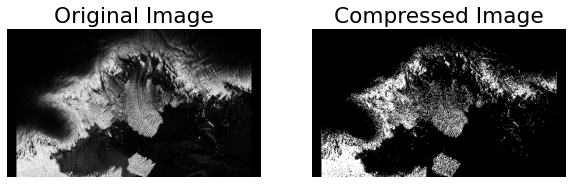

Compression Ratio: 0.02


In [34]:
wavelet('db1',10000)

# Coiflets Wavelet Family

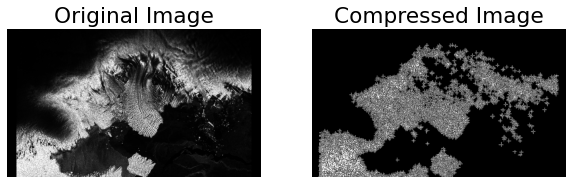

Compression Ratio: 0.00


In [35]:
wavelet('coif12',2000)

In [21]:
print(pywt.wavelist(kind='discrete'))

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']
